CRSP TREASURIES: Daily Time Series
- Date Dated by Treasury (TDATDT)
- Maturity Date at Time of Issue (TMATDT)
- Coupon Rate (TCOUPRT)
- Number of Interest Payments Per Year (TNIPPY)
- First Coupon Payment Date (TFCPDT)
- Daily Ask (TDASK)
- Daily Bid (TDBID)


In [13]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option("display.precision", 2)
np.set_printoptions(precision=2)

In [14]:
df = pd.read_csv('/Users/pranjal/Downloads/bond_data.csv')
cols = ['TDATDT', 'TMATDT', 'TCOUPRT', 'TNIPPY', 'TFCPDT', 'TDASK', 'TDBID']
colnames = ['date', 'maturity', 'coupon', 'numbercoupons', 'firstcoupondate', 'ask', 'bid'] 
df = df[cols]
df.columns = colnames
df.head()

/var/folders/xt/r947d5fd2yz1_fkptq29sn8r0000gn/T/ipykernel_28916/2618670829.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/pranjal/Downloads/bond_data.csv')


,date,maturity,coupon,numbercoupons,firstcoupondate,ask,bid
0,19601221,19610622,0.0,0,NaN,99.96,99.96
1,19601221,19610622,0.0,0,NaN,99.97,99.96
2,19601221,19610622,0.0,0,NaN,99.97,99.97
3,19601221,19610622,0.0,0,NaN,99.98,99.98
4,19601221,19610622,0.0,0,NaN,99.99,99.99


In [15]:
df['date'] = pd.to_datetime(df.date, format = '%Y%m%d')
df['maturity'] = pd.to_datetime(df.maturity, format = '%Y%m%d')
df['price'] = df.ask
df['term'] = (df.maturity - df.date).dt.days
df['term_yrs'] = df.term/365
df['nc'] = df.numbercoupons
df = df[['date', 'coupon', 'nc', 'term', 'price', 'term_yrs']]
df = df[df.term_yrs.round(1).isin([30, 10, 7, 5, 3, 2, 1, 0.5])]
df = df.drop(df[(df.nc==2) & (df.term==1)].index)
df['term'] = df.term_yrs.round(1)

In [16]:
df.head()

,date,coupon,nc,term,price,term_yrs
0,1960-12-21,0.0,0,0.5,99.96,0.5
1,1960-12-21,0.0,0,0.5,99.97,0.5
2,1960-12-21,0.0,0,0.5,99.97,0.5
3,1960-12-21,0.0,0,0.5,99.98,0.5
4,1960-12-21,0.0,0,0.5,99.99,0.5


<AxesSubplot:>

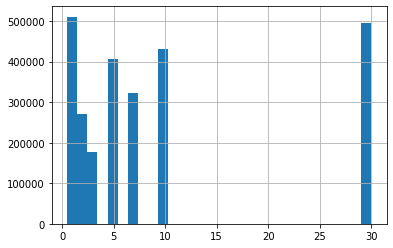

In [17]:
df.term_yrs.hist(bins = 30)

<AxesSubplot:>

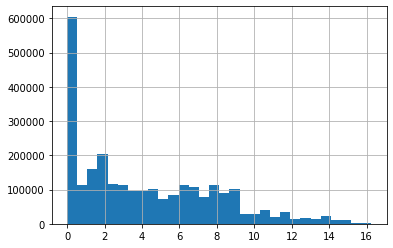

In [18]:
df.coupon.hist(bins = 30)

In [19]:
df[df.nc == 2].term.value_counts()

30.0    494063
10.0    431598
5.0     405805
7.0     323566
2.0     269901
3.0     176096
1.0       2266
Name: term, dtype: int64

In [20]:
df[df.nc == 0].term.value_counts()

0.5    345226
1.0    163239
Name: term, dtype: int64

In [21]:
df[df.nc ==0].coupon.value_counts()

0.0    508465
Name: coupon, dtype: int64

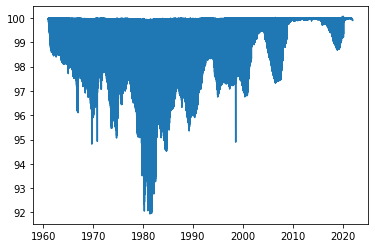

In [34]:
plt.plot(df[df.term == 0.5]['date'], df[df.term == 0.5]['price'])

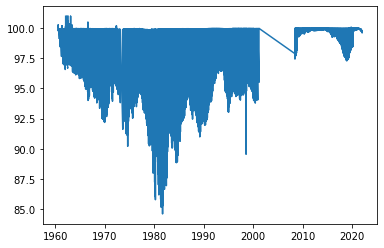

In [37]:
plt.plot(df[df.term == 1.0]['date'], df[df.term == 1.0]['price'])

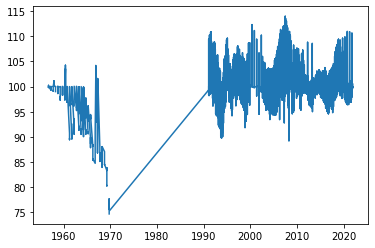

In [40]:
plt.plot(df[df.term == 5.0]['date'], df[df.term == 5.0]['price'])

In [1]:
# Yeild

def y2m(x):
    p = x['price']
    c = x['coupon']
    n = x['term']
    if c == 0:
        y = np.log(100/p)/n
    else:
        n = x['term'] * x['nc']
    return y


In [29]:
df[df.term == 0.5]

KeyboardInterrupt: 